# Исследование рекламных источников  игры "Космические братья" 

Дашборд: https://public.tableau.com/app/profile/igor.yurmanov/viz/Ads_sources_space_game/ad_sources_space_game#1

Презентация: https://disk.yandex.ru/i/zIgMLqHWRolhxw


**Цель проекта** - проанализировать поведение игроков в зависимости от источника перехода.
1. Провессти исследовательский анализ данных
2. Проанализировать влияние источника перехода в игру на поведение пользователя
3. Проверьте статистические гипотезы
    1. время завершения уровня различается в зависимости способа прохождения:
        - через реализацию проекта
        - через победу над первым игроком
    2. период пользования игрой различается в зависимости от источника привлечения пользователя

**Описание данных** - основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. 

Датасет *ad_costs.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

# План исследования

1 [Загрузка и предобработка данных](#part1)

1.1 [Загрузка данных](#part1_1)

1.2 [Изучение таблицы с рекламными источниками](#part1_2)

1.3 [Изучение таблицы с затратами на рекламу](#part1_3)

1.4 [Изучение таблицы с игровыми событиями](#part1_4)

1.5 [Вывод по этапу предварительной обработки данных](#part1_5)

2 [Исследовательский анализ данных](#part2)

2.1 [Определение временного периода для действий пользователей и для рекламной кампании](#part2_1)

2.2 [Построение профилей пользователей: первая дата активности, последняя дата, период пользования игрой, количество построенных зданий, количество событий, пройден ли первый уровень и каким образом (победа над врагом или реализация проекта), канал привлечения](#part2_2) 

2.3 [Сколько всего пользователей. Как они распределены по каналам привлечения. Есть ли органические пользователи и сколько их](#part2_3)

2.4 [Сколько стоит реклама по каждому каналу. Сколько стоит привлечение одного пользователя по каждому каналу](#part2_4)

2.5. [Динамика новых пользователей и событий в игре, затрат на рекламу](#part2_5)

2.6. [Сколько в среднем пользователи играли (лайфтайм), сколько построили зданий, совершили событий, сколько завершили 1 уровень и каким способом](#part2_6)

2.7. [Различия в поведении "бойцов", "строителей" и не прошедших первый этап](#part2_7)

2.8. [Выводы по исследовательскому анализу данных](#part2_8)

3 [Влияние источника привлечения на поведение пользователя в игре](#part3)

3.1 [Количество пользователей прошедших 1 уровень в разрезе источников](#part3_1)

3.2 [Соотношение "бойцов" и "строителей" по источникам](#part3_2)

3.3 [Продолжительность пользования игрой в разрезе источников](#part3_3)

3.4 [Количество построенных зданий в зависимости от канала привлечения](#part3_4)

3.5 [Графики по количеству построенных зданий в зависимости от источника](#part3_5)

3.6 [Выводы по влиянию источников привлечения на поведение пользователя в игре](#part3_6)

4 [Проверка статистических гипотез](#part4)

4.1 [Проверка гипотезы "время завершения уровня различается в зависимости способа прохождения"](#part4_1):
- через реализацию проекта
- через победу над первым игроком
        
4.2 [Провека гипотезы "время завершения уровня различается в зависимости от источника привлечения пользователя"](#part4_2)

4.3 [Вывод по статистическому анализу](#part4_3)

5 [Общий вывод](#part_5)
 

<a id='part1'></a>
##  Загрузка и предобработка данных

In [1]:
# Импорт библиотек
import pandas as pd # Paandas для таблиц
import matplotlib.pyplot as plt # визуализация
import numpy as np # математические вычисления
import seaborn as sns # продвинутая визуализация
import datetime as dt # для работы с датами
import math as mth # для математических вычислений
from scipy import stats as st # для статистики

# единый стиль для графиков
sns.set_palette('pastel') # палитра пастельных тонов
sns.set_style('dark') # темный стиль графика

# убираем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', 120)

# ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

# функция для получения основной информации о таблице
def datainfo(df):
    print('\nТаблица:')
    display(df.head())
    print('\nЧисловое описание таблицы:')
    display(df.describe())
    print('\nСтруктура таблицы:')
    df.info()
    print(f'\nКоличество пропущенных значений: {df.isnull().sum().sum()}')
    print(f'\nКоличество полных дубликатов: {df.duplicated().sum()}')
    print(f'\nДоля дубликатов составляет: {(df.duplicated().sum() / len(df)):.2%}')

# путь к данным
path = r'c:/projects/datasets/'

<a id='part1_1'></a>
### Загрузка данных

In [2]:
# Загрузка данных
try:
    user_source = pd.read_csv(path + 'user_source.csv') # датасет пользователь + рекламный источник
    ad_costs = pd.read_csv(path + 'ad_costs.csv') # датасет со стоимостью рекламы
    game_actions = pd.read_csv(path + 'game_actions.csv') # основной датасет с событиями пользователей
except:
    print('Попробуйте другие параметры.')

<a id='part1_2'></a>
### Изучение таблицы с рекламными источниками

In [3]:
# Изучаем таблицу user_source
datainfo(user_source)


Таблица:


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



Числовое описание таблицы:


,user_id,source
count,13576,13576
unique,13576,4
top,0001f83c-c6ac-4621-b7f0-8a28b283ac30,yandex_direct
freq,1,4817



Структура таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB

Количество пропущенных значений: 0

Количество полных дубликатов: 0

Доля дубликатов составляет: 0.00%


В таблице user_source с информацией о рекламных источниках пользователей пропусков и явных дубликатов нет. Типы данных верные и названия столбцов в "питоновском" стиле.

In [4]:
# Проверка не явных дубликатов в названиях рекламных источников.
user_source['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

Не явных дубликатов в названиях рекламных источников в таблице `user_source` нет.

<a id='part1_3'></a>
### Изучаем таблицу с затратами на рекламу

In [5]:
# Изучаем таблицу ad_costs
datainfo(ad_costs)


Таблица:


,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77



Числовое описание таблицы:


,cost
count,28.00
mean,271.56
std,286.87
min,23.31
25%,66.75
50%,160.06
75%,349.03
max,969.14



Структура таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

Количество пропущенных значений: 0

Количество полных дубликатов: 0

Доля дубликатов составляет: 0.00%


В таблице `ad_costs` с данными по затратам на рекламу пропусков и явных дубликатов нет. Названия столбцов в правильном стиле, нужно скорректировать тип данных для столбца с датами и проверить не явные дубликаты в названиях рекламных источников. 

In [6]:
# Изменение типа данных столбца с датами в таблице ad_costs
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
ad_costs.info() # контроль

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


In [7]:
# проверка не явных дубликатов в названиях рекламных источников таблицы ad_costs
ad_costs['source'].unique()

array(['facebook_ads', 'instagram_new_adverts', 'yandex_direct',
       'youtube_channel_reklama'], dtype=object)

<a id='part1_4'></a>
### Изучаем таблицу с игровыми событиями

In [8]:
# изучаем таблицу game_actions
datainfo(game_actions)


Таблица:


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



Числовое описание таблицы:


,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 12:35:56,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866



Структура таблицы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

Количество пропущенных значений: 141457

Количество полных дубликатов: 1

Доля дубликатов составляет: 0.00%


In [9]:
# уникальные события в столбце `event`
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

В таблице `game_actions` названия столбцов не требуют корректировки. Столбец с датами событий `event_datetime` нужно привести к типу данных `datetime`. Обнаружен один полный дубликат, удалим его. Пропуски в столбце `project_tipe` связаны предположительно с тем, что не все игроки выполнили проект. Аналогично пропуски в столбце `building_type` соответствуют событиям не связанным со стройкой зданий. 

In [10]:
# Корректировка типа данных столбца event_datetime
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])

# Избавляемся от дубликата
game_actions.drop_duplicates(inplace=True)

# Контроль
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


<a id='part1_5'></a>
### Вывод по предварительной обработке данных

Данные загружены, столбцы с датами преобразованы к нужному типу. Значимых пропусков и не явных дубликатов не обнаружено, в таблице с игровыми событиями удален один явный дубликат.

<a id='part2'></a>
## Исследовательский анализ данных

<a id='part2_1'></a>
### Определение временного периода для действий пользователей и для рекламной кампании

In [11]:
# диапазон дат событий
event_first_date = game_actions['event_datetime'].min()
event_last_date = game_actions['event_datetime'].max()
print(f'Диапазон дат событий: {event_first_date:%Y-%m-%d} - {event_last_date:%Y-%m-%d}')

# диапазон дат рекламной кампании
ads_first_date = ad_costs['day'].min()
ads_last_date = ad_costs['day'].max()
print(f'Диапазон дат рекламной кампании: {ads_first_date:%Y-%m-%d} - {ads_last_date:%Y-%m-%d}')

Диапазон дат событий: 2020-05-04 - 2020-06-05
Диапазон дат рекламной кампании: 2020-05-03 - 2020-05-09


Данные по датам событий представлены с 04 мая 2020 по 05 июня 2020. Рекламная кампания проводилась с 03 по 09 мая 2020 с предоплатой за 1 день. То есть оплаченная 03 мая реклама была показана и привлекла пользователей 04 мая. В таблице ad_costs добавим 1 день в столбец с датами. Все совпадает с данными технического задания: данные по когорте пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно. Нужно на всякий случай проверить, не попали ли в выборку пользователи из других когорт.

In [12]:
# Добавление 1 дня в даты таблицы ad_costs
ad_costs['day'] = ad_costs['day'] + pd.to_timedelta('1 day')
# прверка
ads_first_date = ad_costs['day'].min()
ads_last_date = ad_costs['day'].max()
print(f'Диапазон дат рекламной кампании: {ads_first_date:%Y-%m-%d} - {ads_last_date:%Y-%m-%d}')

Диапазон дат рекламной кампании: 2020-05-04 - 2020-05-10


<a id='part2_2'></a>
### Построение профилей пользователей 
(первая дата активности, последняя дата, период пользования игрой, количество построенных зданий, количество событий, пройден ли первый уровень и каким образом (победа над врагом или реализация проекта), канал привлечения)

In [13]:
# Добавляем столбец с днем события
game_actions['day'] = game_actions['event_datetime'].dt.date

# находим для каждого пользователя времея первого действия, последнего действия, количество действий, количество зданий
users = game_actions.sort_values(by = ['user_id', 'event_datetime']).groupby('user_id').agg({
    'event_datetime': ['first', 'last'],
    'day': 'first',
    'event': 'count',
    'building_type': 'count',
    }).reset_index()
users.columns = ['user_id', 'first_event_time', 'last_event_time', 'first_day', 'event_cnt', 'building_cnt']

# считаем продолжительность использования игры
users['duration'] = ((users['last_event_time'] - users['first_event_time']) / np.timedelta64(1, 'D')).astype(int)

# добавляем отметку о прохождении 1 этапа игры

winners = game_actions.query('event == "finished_stage_1"')['user_id'].unique() # пользователи, прошедшие 1 этап игры
project_made = game_actions.query('event == "project"')['user_id'].unique() # пользователи, сделавшие проект

def stage_done(df): # функция для добавления отметки каким образом пройден 1 этап игры.
    if df['user_id'] in winners and df['user_id'] in project_made:
        return 'builder'
    elif df['user_id'] in winners and df['user_id'] not in project_made:
        return 'fighter'
    else:
        return 'dont_made'

users['stage_done'] = users.apply(stage_done, axis=1)
game_actions['stage_done'] = game_actions.apply(stage_done, axis=1)

# добавляем рекламный источник
users = users.merge(user_source, on='user_id')

users.head()

,user_id,first_event_time,last_event_time,first_day,event_cnt,building_cnt,duration,stage_done,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,2020-05-06,13,13,14,dont_made,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,2020-05-06,9,9,12,dont_made,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,2020-05-05,4,4,8,dont_made,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,2020-05-05,9,8,6,fighter,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,2020-05-22 02:46:45,2020-05-05,12,12,16,dont_made,facebook_ads


In [14]:
# проверяем, не попали ли в выборку пользователи из других когорт
print(f"Минимальная дата начала использования игры: {(users['first_day'].min()):%Y-%m-%d}")
print(f"Максимальная дата начала использования игры: {(users['first_day'].max()):%Y-%m-%d}")

Минимальная дата начала использования игры: 2020-05-04
Максимальная дата начала использования игры: 2020-05-10


Все верно, в выборке только пользователи, которые начали пользоваться игрой в период с 4 по 10 мая.

<a id='part2_3'></a>
### Сколько всего пользователей, их распределение по каналам привлечения. Есть ли органические пользователи и сколько их.

In [15]:
# уникальные значения источников привлечения
users['source'].unique()

array(['facebook_ads', 'yandex_direct', 'youtube_channel_reklama',
       'instagram_new_adverts'], dtype=object)

Все пользователи пришли через рекламные каналы, органических нет.

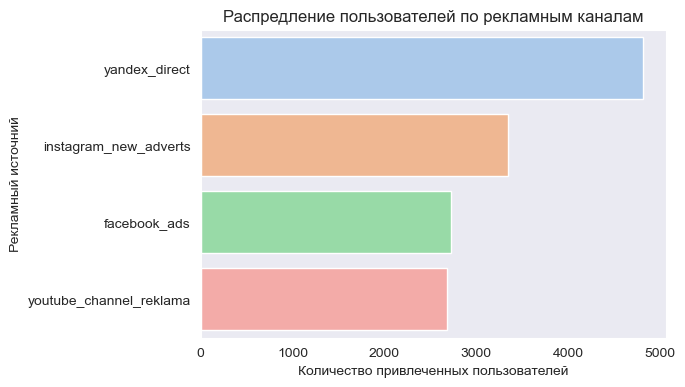

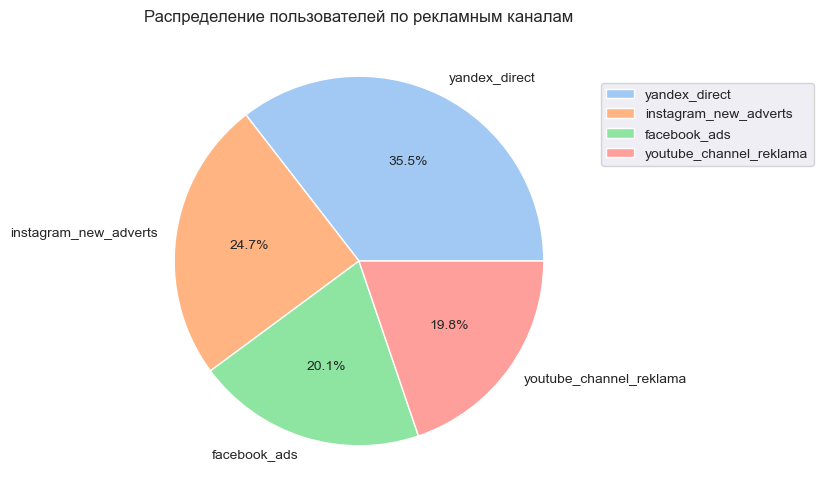

,source,quantity,ratio_%
2,yandex_direct,4817,35.48
1,instagram_new_adverts,3347,24.65
0,facebook_ads,2726,20.08
3,youtube_channel_reklama,2686,19.78


Всего пользователей: 13576
Всего рекламных источников: 4


In [16]:
# подсчет колиечества пользователей
users_cnt = game_actions['user_id'].nunique()
# подсчет колиечества рекламных источников
source_cnt = user_source['source'].nunique()

# таблица распределения пользователей по рекламным каналам
users_by_source = users.groupby('source').agg(
    {'user_id': 'count'}).reset_index().sort_values(by='user_id', ascending=False)
users_by_source.columns = ['source', 'quantity']
users_by_source['ratio_%'] = users_by_source['quantity'] / users_cnt *100

# диаграмма распредления пользователей по рекламным каналам
plt.figure(figsize=(6, 4))
plt.title('Распредление пользователей по рекламным каналам')
sns.barplot(x='quantity', y='source', data=users_by_source)
plt.ylabel('Рекламный источний')
plt.xlabel('Количество привлеченных пользователей')
plt.show()

# круговая диаграмма
users.groupby('source').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False).plot(
    y='user_id', kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (0.6, 0, 0.9, 0.9))
plt.ylabel('')
plt.title('Распределение пользователей по рекламным каналам')
plt.show()

display(users_by_source)
print(f'Всего пользователей: {users_cnt}')
print(f'Всего рекламных источников: {source_cnt}')

В данных содержится информация о 13 576 пользователях. Пользователи пришли из четырех рекламных источников, органических пользователей нет. Больше всего пользователей привлечено через канал `yandex_direct`, 35,5 %. На втором месте `instagram_new_adverts`, 24,7 %. `Facebook` и `youtube` на третьем месте, примерно по 20 % у каждого.

<a id='part2_4'></a>
### Сколько стоит реклама по каждому каналу. Сколько стоит привлечение одного пользователя по каждому каналу

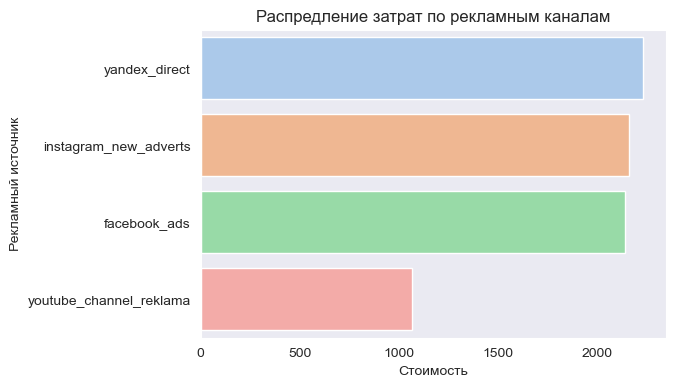

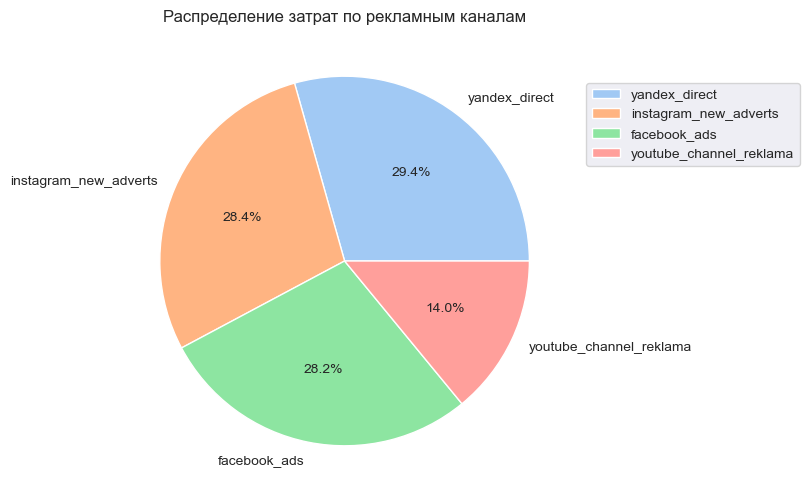

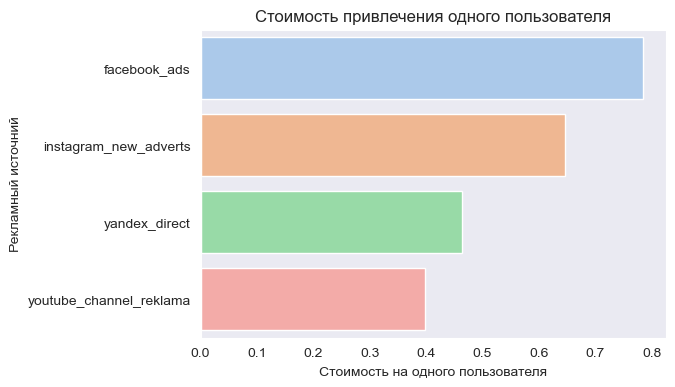

Общие затраты на рекламу: 7603.58


,source,cost,ratio_%,user_cost
2,facebook_ads,"2,140.90",28.16,0.79
1,instagram_new_adverts,"2,161.44",28.43,0.65
0,yandex_direct,"2,233.11",29.37,0.46
3,youtube_channel_reklama,"1,068.12",14.05,0.40


In [17]:
# Общая стоимость рекламы
ads_total_cost = ad_costs['cost'].sum()

# Затраты на рекламу по каждому источнику
ads_cost_by_source = ad_costs.groupby('source').agg({'cost': 'sum'}).reset_index().sort_values(by='cost', ascending=False)
ads_cost_by_source = ads_cost_by_source.merge(users_by_source, on='source')
ads_cost_by_source['ratio_%'] = ads_cost_by_source['cost'] / ads_total_cost *100
ads_cost_by_source['user_cost'] = ads_cost_by_source['cost'] / ads_cost_by_source['quantity']
ads_cost_by_source = ads_cost_by_source.drop('quantity', axis=1)

# диаграмма распределения затрат по рекламным каналам
plt.figure(figsize=(6, 4))
plt.title('Распредление затрат по рекламным каналам')
sns.barplot(x='cost', y='source', data=ads_cost_by_source)
plt.ylabel('Рекламный источник')
plt.xlabel('Стоимость')
plt.show()

# круговая диаграмма
ads_cost_by_source.groupby('source').agg({'cost': 'sum'}).sort_values(by='cost', ascending=False).plot(
    y='cost', kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (0.6, 0, 0.9, 0.9))
plt.ylabel('')
plt.title('Распределение затрат по рекламным каналам')
plt.show()

# Стоимость привлечения одного пользователя
ads_cost_by_source = ads_cost_by_source.sort_values(by='user_cost', ascending=False)
plt.figure(figsize=(6, 4))
plt.title('Стоимость привлечения одного пользователя')
sns.barplot(x='user_cost', y='source', data=ads_cost_by_source)
plt.ylabel('Рекламный источний')
plt.xlabel('Стоимость на одного пользователя')
plt.show()

print(f'Общие затраты на рекламу: {ads_total_cost:.2f}')
display(ads_cost_by_source)

Затраты на рекламу распределились примерно поровну между `Yandex`, `Instagram` и `Facebook` (28-29%) и 14 % доля `Youtube`. Самые высокие затраты на привлечение одного клиента у `Facebook` (0,79), самые низкие у `Youtube` (0,40). `Yandex` выглядит привлекательным рекламным каналом: при примерно одинаковых общих затратах удалось привлечь большее количество клиентов по сравнению с `Facebook` и `Instagram`. `Youtube` также привлекателен в силу низких затрат. Через него пришло меньшее количество пользователей. Если это связано только с бюджетными ограничениями, а не с меньшей заинтересованностью его аудитории игрой, тогда можно перераспределить бюджет в его пользу. 

<a id='part2_5'></a>
### Динамика новых пользователей и событий в игре, затрат на рекламу

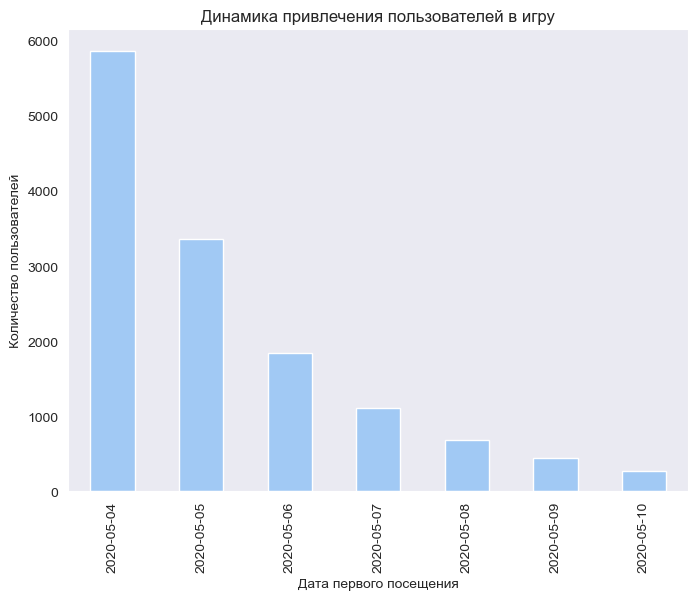

In [18]:
# Динамика привлечения пользователей в игру
users.groupby('first_day')['user_id'].count().plot(
    kind='bar', 
    title='Динамика привлечения пользователей в игру',
    figsize=(8, 6)
    )
plt.ylabel('Количество пользователей')
plt.xlabel('Дата первого посещения');

Основная часть пользователей привлечена в начале рекламной кампании, тренд нисходящий.

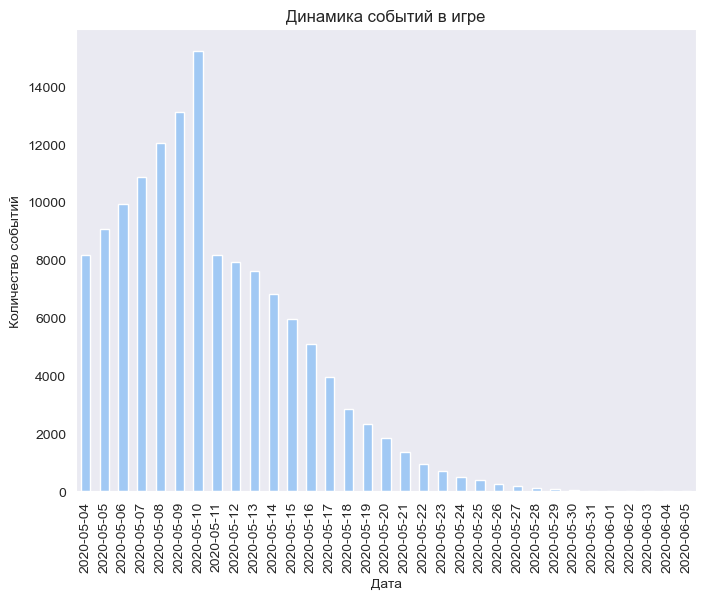

In [19]:
# Динамика событий в игре
game_actions['event_date'] = game_actions['event_datetime'].dt.date
game_actions.groupby('event_date')['event'].count().plot(
    kind='bar', 
    title='Динамика событий в игре',
    figsize=(8, 6)
    )
plt.ylabel('Количество событий')
plt.xlabel('Дата');

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ 

* Причину падения в числе активных пользователей после 10 мая можно было бы ещё поискать в длительности игры пользователей по разным стратегиям
* Было бы ещё любопытно заглянуть в разбивку построек по типам в динамике, там есть интересные находки, объясняющие косвенно спад
</div>

C 4 по 10 мая в игре наблюдается рост событий, в это время в игру приходят новые пользователи в результате рекламной компании. с 11 мая наблюдаем постепенный спад. Новых игроков нет, действующие постепенно завершают первый игровой этап или теряют интерес к игре. 

Как показано [далее](#duration) игроки не прошедшие 1 этап завершают игру в среднем через 9 дней, прошедшие путем победы над противником через 10 дней и путем завершения проекта через 13 дней. Эффекты от завершения этапа должны нарастать с 12 мая.

Резкий спад числа событий после 10 мая вероятно связан с полным прекращением после 10 мая событий `assemmbly_shop`, дальнейшее снижение с прохождением пика количества событий `spaceport` 11 мая и события `research_center` 12-13 мая. [Ссылка](#events)

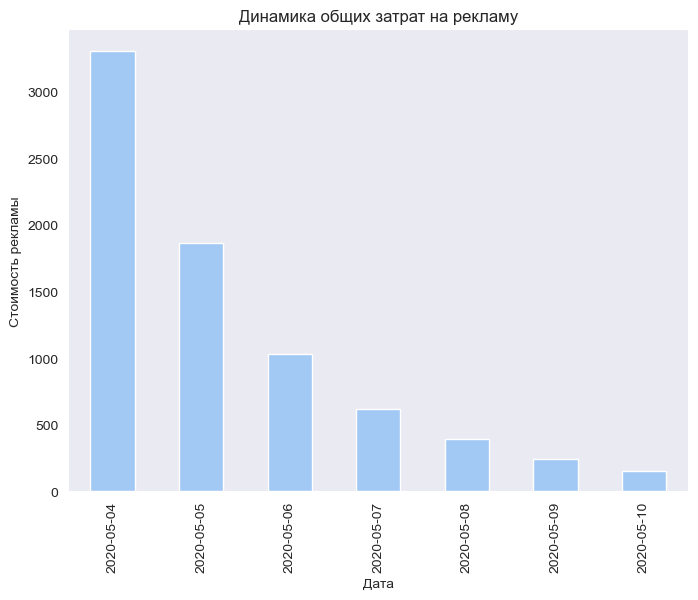

In [20]:
# Динамика затрат на рекламу.
ad_costs['day'] = ad_costs['day'].dt.date
ad_costs.groupby('day')['cost'].sum().plot(
    kind='bar', 
    title='Динамика общих затрат на рекламу',
    figsize=(8, 6)    
    )
plt.ylabel('Стоимость рекламы')
plt.xlabel('Дата');

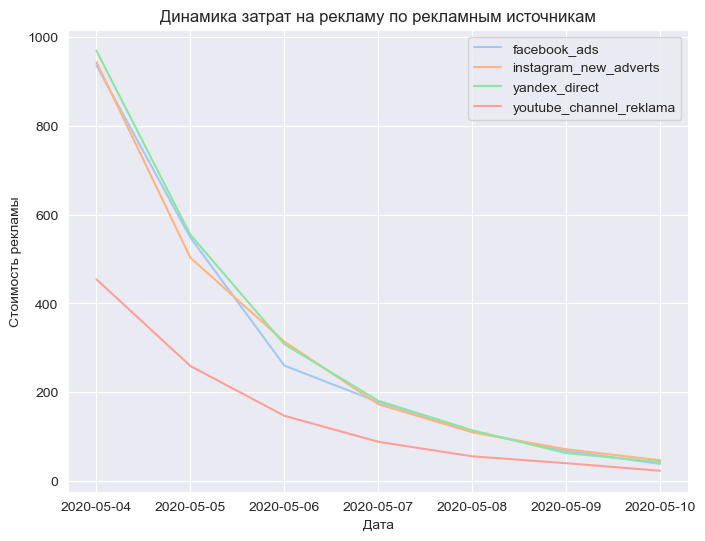

In [21]:
# динамика затрат на рекламу по каналам
ad_costs.pivot_table(
    index = 'day',
    columns = 'source',
    values = 'cost'
    ).plot(figsize=(8,6), grid=True)
plt.title('Динамика затрат на рекламу по рекламным источникам')
plt.ylabel('Стоимость рекламы')
plt.xlabel('Дата')
plt.legend()
plt.show();

Затраты на рекламу уменьшаются в процессе рекламной кампании в связи со снижением количества привлекаемых клиентов. Динамика затрат по рекламным каналам сходная

**Общий вывод по разделу**

- В процессе рекламной кампании наблюдается значительное снижение числа привлекаемых клиентов и, соответственно, затрат на рекламу. Вероятно, это связано с динамикой бюджета на рекламу, уменьшением затрат на рекламу с временем и меньшим привелчением клиентов.
- С 4 по 10 мая наблюдается рост числа событий, совершаемых пользователями в игре. Вероятная причина роста - приток новых игроков от рекламны. Далее спад т.к. новых игроков не приходило, а действующие пользователи постепенно проходили первый этап или бросали игру.

<a id='part2_6'></a>
### Сколько в среднем пользователи играли (лайфтайм), сколько построили зданий, совершили событий, сколько завершили 1 уровень и каким способом

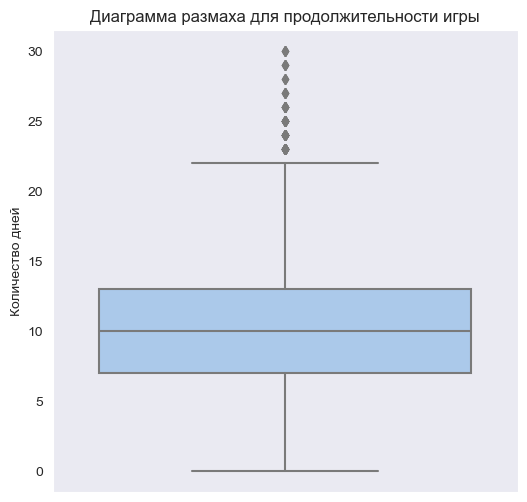

count   13,576.00
mean        10.18
std          4.36
min          0.00
25%          7.00
50%         10.00
75%         13.00
max         30.00
Name: duration, dtype: float64

Средняя продолжительность игры 10.18 дней

95% пользователей пользовались игрой менее 18.00 дней


In [22]:
# Диаграмма размаха для продолжительности игры
plt.figure(figsize=(6, 6))
plt.title('Диаграмма размаха для продолжительности игры')
ax = sns.boxplot(y='duration', data=users)
plt.ylabel('Количество дней')
plt.show();

# Числовое описание данных
print(users['duration'].describe());
avg_duration = users['duration'].mean()
print(f'\nСредняя продолжительность игры {avg_duration:.2f} дней')
abnormal_duration = np.percentile(users['duration'], 95)
print(f'\n95% пользователей пользовались игрой менее {abnormal_duration:.2f} дней')

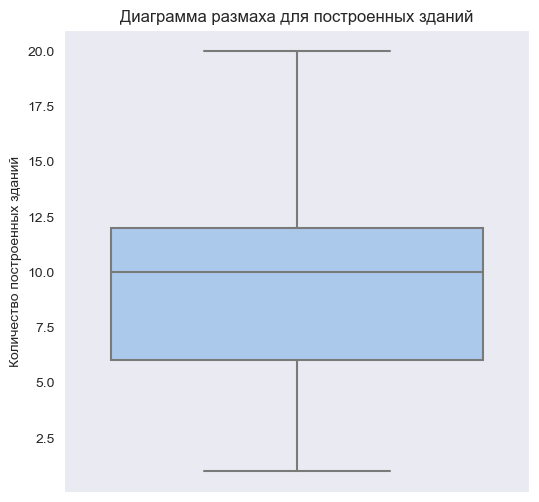

count   13,576.00
mean         9.43
std          3.86
min          1.00
25%          6.00
50%         10.00
75%         12.00
max         20.00
Name: building_cnt, dtype: float64

Среднее количество построенных зданий 9.43

95% пользователей построили менее 16.00 зданий


In [23]:
# Диаграмма размаха для построенных зданий
plt.figure(figsize=(6, 6))
plt.title('Диаграмма размаха для построенных зданий')
ax = sns.boxplot(y='building_cnt', data=users)
plt.ylabel('Количество построенных зданий')
plt.show();
print(users['building_cnt'].describe());
avg_bilding = users['building_cnt'].mean()
print(f'\nСреднее количество построенных зданий {avg_bilding:.2f}')
abnormal_buildings = np.percentile(users['building_cnt'], 95)
print(f'\n95% пользователей построили менее {abnormal_buildings:.2f} зданий')

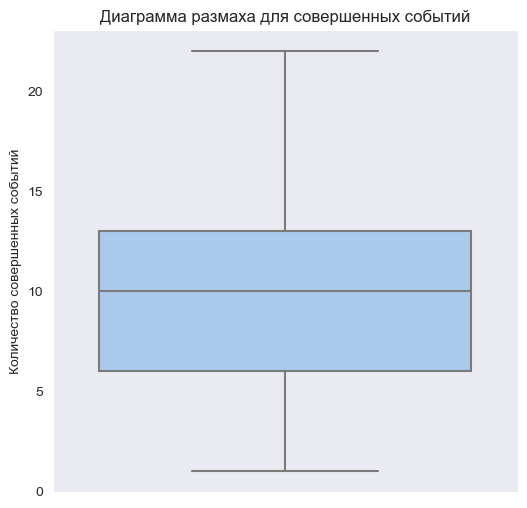

count   13,576.00
mean         9.99
std          4.15
min          1.00
25%          6.00
50%         10.00
75%         13.00
max         22.00
Name: event_cnt, dtype: float64

Среднее количество совершенных событий 9.99

95% пользователей совершили менее 16.00 событий


In [24]:
# Диаграмма размаха для совершенных событий
plt.figure(figsize=(6, 6))
plt.title('Диаграмма размаха для совершенных событий')
ax = sns.boxplot(y='event_cnt', data=users)
plt.ylabel('Количество совершенных событий')
plt.show();
print(users['event_cnt'].describe());
avg_events = users['event_cnt'].mean()
print(f'\nСреднее количество совершенных событий {avg_events:.2f}')
abnormal_events = np.percentile(users['event_cnt'], 95)
print(f'\n95% пользователей совершили менее {abnormal_events:.2f} событий')

Данные по событиям, построенным зданиям и продолжительности билзки к нормальному распределению, среднее значение почти совпадает с медианой.

In [25]:
# типы построенных зданий
game_actions['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

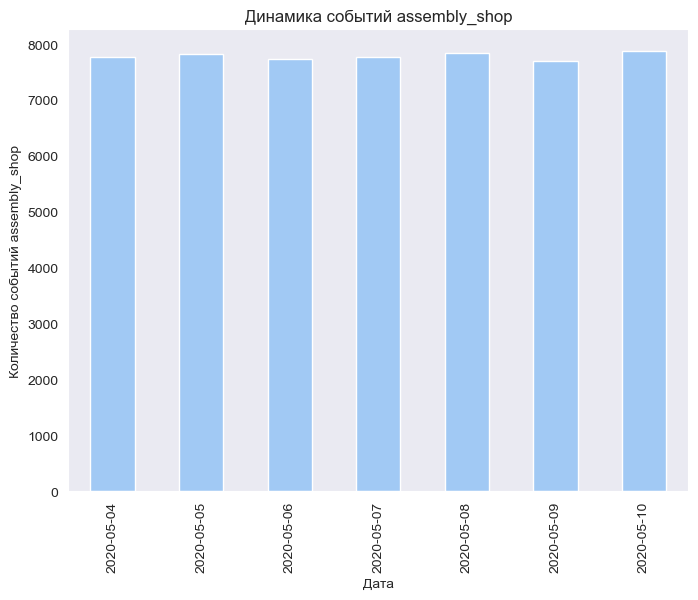

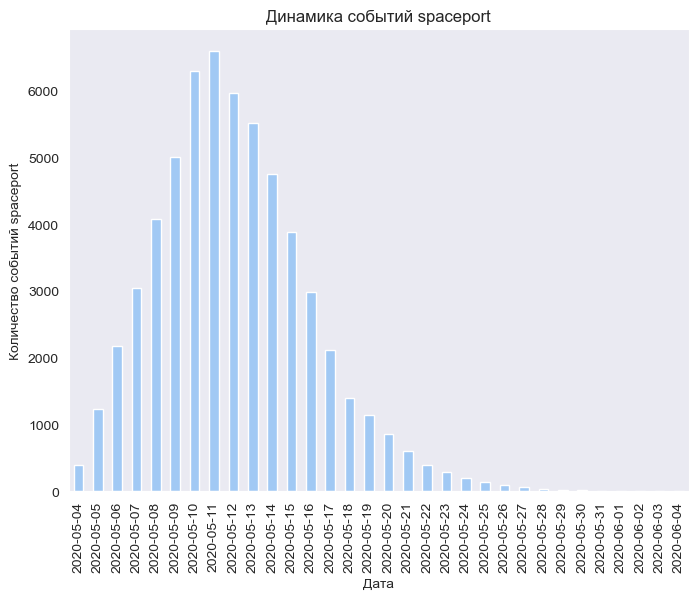

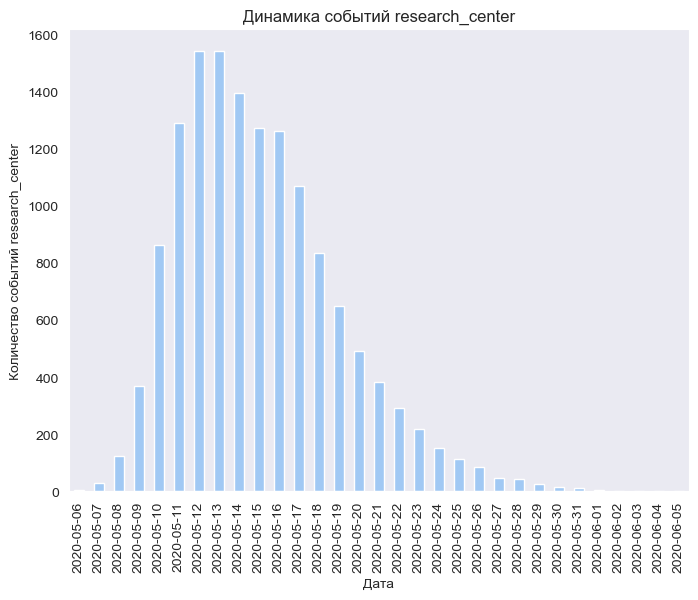

In [26]:
# создаем таблицу с типом здания и датой события (постройки)
buildings = game_actions[['event_date', 'user_id', 'building_type']]
buildings = buildings.dropna()

# строим графики динамики событи постройки зданий
for i in buildings['building_type'].unique():

    buildings.loc[buildings['building_type'] == i].groupby('event_date')['user_id'].count().plot(
        kind='bar',
        title=f'Динамика событий {i}',
        figsize=(8, 6)    
        )
    plt.ylabel(f'Количество событий {i}')
    plt.xlabel('Дата')
    plt.show();

<a id='events'></a>
- Событие постройка здания `assembly_shop` происходило в период привлечения пользователей через рекламные источники. Возможно, это обязательное событие при активации пользователей. Количество этих событий примерно одинаково каждый день, около 7900. Это странно, поскольку как выяснено ранее, количество привлеченных пользователей заметно снижалось в процессе рекламной кампании. Без детальной информации о игровой механики это объяснить не возможно.
- Событие постройка `spaceport` распределено нормально, пик 11 мая, около 6500.
- Событе постройка `research_center` происходило менее часто, около 1500. Пик 12-13 мая. 

Количество пользователей, прошедших первый этап: 5817
Всего пользователей: 13576
Доля прошедших первый этап: 42.8%
Выполнили проект: 1866
Победили первого противника: 3951


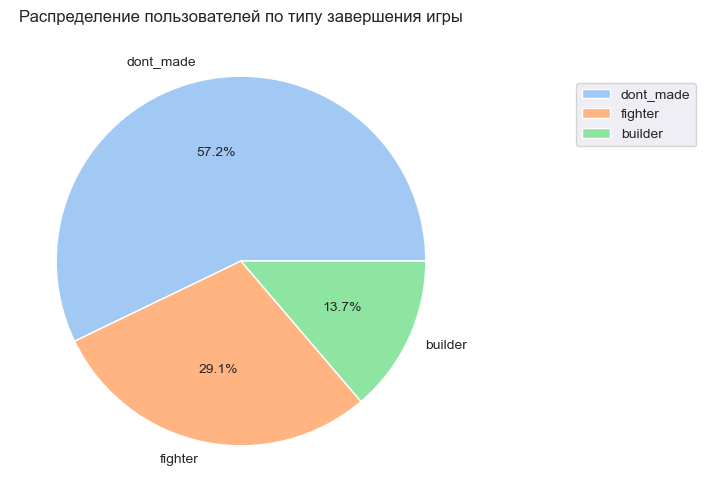

In [27]:
# количество пользователей, прошедших игру
print(f'Количество пользователей, прошедших первый этап: {len(winners)}')
print(f'Всего пользователей: {users_cnt}')
print(f'Доля прошедших первый этап: {(len(winners) / users_cnt):.1%}')
print(f'Выполнили проект: {len(project_made)}')
print(f'Победили первого противника: {len(winners) - len(project_made)}')

# Распределение пользователей по типу завершения игры
users.groupby('stage_done').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False).plot(
    y='user_id', kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (0.6, 0, 0.9, 0.9))
plt.ylabel('')
plt.title('Распределение пользователей по типу завершения игры')
plt.show()

**Выводы по разделу**

- Среднее время использования игры составило 10 дней, в среднем пользователи строили 9 зданий и совершали 10 событий. Данные распределены нормально, среднее значение практически совпадает с медианным.
- Событие `assebly_shop` происходило в период активации новых пользователей, примерно одинаковое количество 7900 каждый день, не соответствует уменьшению количества привлеченных пользователей. Событие `spaceport` около 6000 в пике 11 мая, нормальное распределение. Событие `research_centre` менее популярно, около 1500 12-13 мая.
- 57% пользователей не прошли первый этап. Или им не понравилась игра, или оказалась слишком сложной. Среди завешивших первый этап большая часть (примерно 2/3) прошла его путем победы над первым противником. Меньшая часть игроков добилась победы через завершение проекта.

<a id='part2_7'></a>
### Различия в поведении "бойцов", "строителей" и не прошедших первый этап

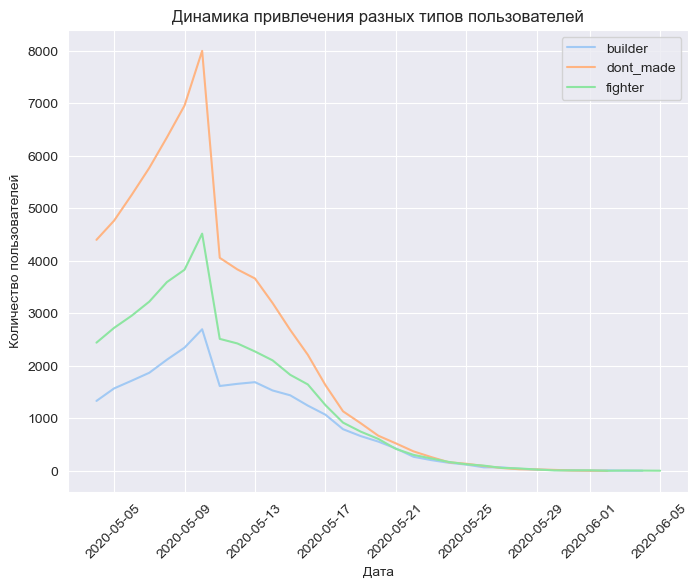

In [28]:
# Динамика привлечения разных типов пользователей

game_actions.head()

game_actions.pivot_table(
    index = 'day',
    columns = 'stage_done',
    values = 'user_id',
    aggfunc = 'count'
    ).plot(figsize=(8,6), grid=True)
plt.title('Динамика привлечения разных типов пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Дата')
plt.legend()
plt.xticks(rotation=45)
plt.show();

Динамика привлечения разных типов пользователей совпадает.

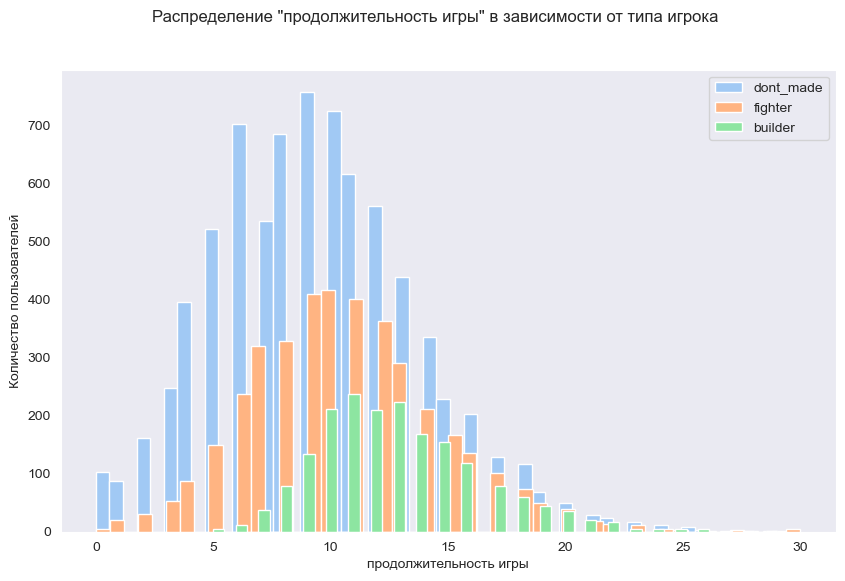


Медианное "продолжительность игры" для пользователей dont_made: 9.00
Медианное "продолжительность игры" для пользователей fighter: 10.00
Медианное "продолжительность игры" для пользователей builder: 13.00


In [29]:
# Функция для визуализации количества пользователей по измерению в зависимости от стратегии

def viz_stage_done(dimension, sign):

# Распределение времени использования игрой в зависимости от типа игрока
    plt.figure(figsize=(10, 6))
    plt.suptitle('Распределение "'+ sign +'" в зависимости от типа игрока')
    c = 0
    for i in users['stage_done'].unique():
        c+=1
        plt.hist(users.query('stage_done == @i')[dimension], bins=50)
        plt.xlabel(sign)
        plt.ylabel('Количество пользователей')
    plt.legend(users['stage_done'].unique())    
    plt.show();

# среднее время использования игры
    print()
    for i in users['stage_done'].unique():
        b = users.query('stage_done == @i')[dimension].median()
        print(f'Медианное "{sign}" для пользователей {i}: {b:.2f}')
    
viz_stage_done('duration', 'продолжительность игры')    

<a id='duration'></a>
Дольше всего пользовались игрой пользователи, прошедшие первый этап через завершение проекта, медианное значение 13 дней. Пользователи прошедшие 1 этап победой над первым противником провели в игре меньше времени, 11 дней медиана. Не прошедшие 1 этап игроки в среднем провели в игре 9 дней. Но это значение сравнимо с предыдущими 2 категориями, не все не прошедшие 1 этап ушли из игры в первые 5 дней. Распределения величин похожи на нормальные.


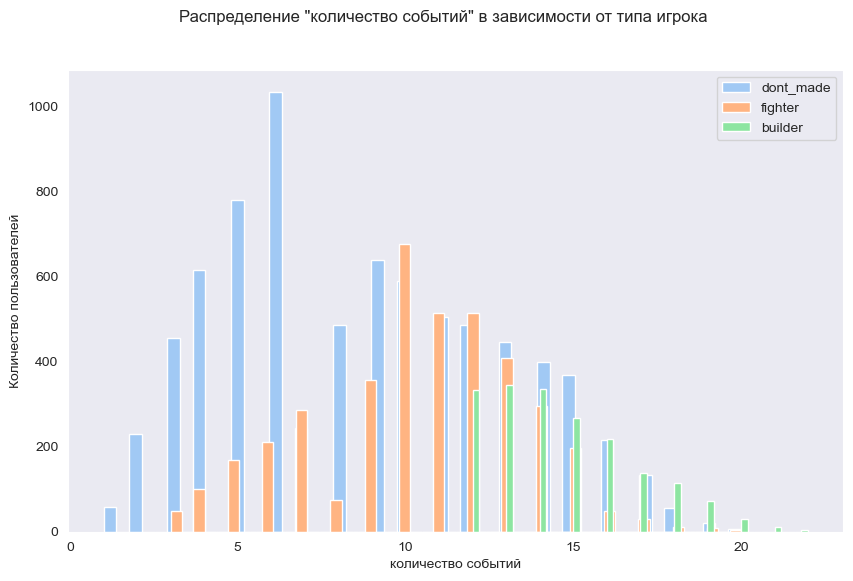


Медианное "количество событий" для пользователей dont_made: 8.00
Медианное "количество событий" для пользователей fighter: 11.00
Медианное "количество событий" для пользователей builder: 14.00


In [30]:
# Распределение совершенных событий в зависимости от типа игрока

viz_stage_done('event_cnt', 'количество событий')

Больше всего событий совершили пользователи, прошедшие первый этап через завершение проекта, медианное значение 14. Пользователи прошедшие 1 этап победой над первым противником совершили 11 событий (медиана). Не прошедшие 1 этап игроки в среднем совершили 8 событий. 

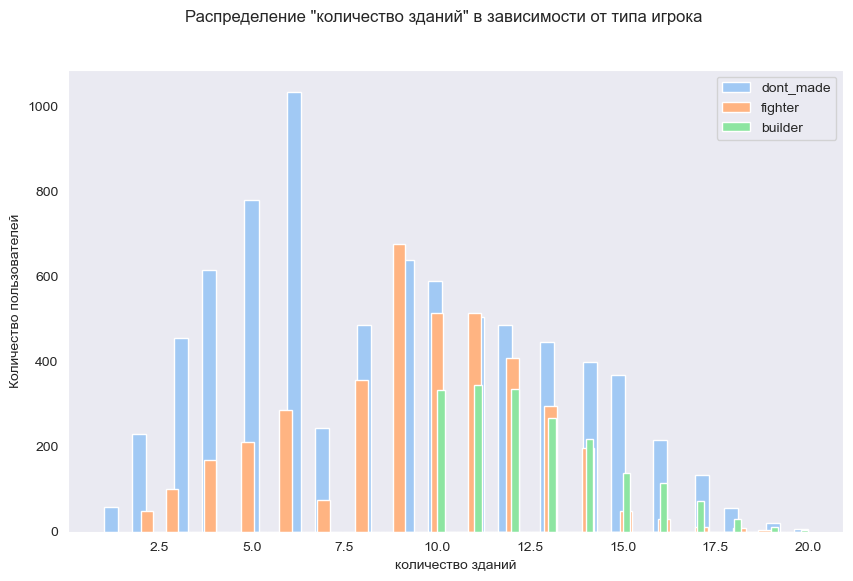


Медианное "количество зданий" для пользователей dont_made: 8.00
Медианное "количество зданий" для пользователей fighter: 10.00
Медианное "количество зданий" для пользователей builder: 12.00


In [31]:
# Количество построенных зданий в зависимости от типа игрока

viz_stage_done('building_cnt', 'количество зданий')

Больше всего зданий построили пользователи, прошедшие первый этап через завершение проекта, медианное значение 12. Пользователи прошедшие 1 этап победой над первым противником построили 10 зданий (медиана). Не прошедшие 1 этап игроки в построили 8 зданий. На распределениях заметно снижение количества пользователей, построивших 7-8 зданий для игроков не завершивших 1 этап и для категории `fighter`.  

<a id='part2_8'></a>
### Выводы по исследовательскому анализу данных

- Данные по датам событий представлены с **04 мая 2020** по **05 июня 2020**. Рекламная кампания проводилась с **04** по **10 мая 2020**. Все пользователи пришли в игру через рекламные каналы, органических нет.


- Затраты на рекламу распределились примерно поровну между `Yandex`, `Instagram` и `Facebook` (28-29%),  14 % составляет доля `Youtube`. Самые высокие затраты на привлечение клиента черех `Facebook` (0,79), самые низкие - `Youtube` (0,40). `Yandex` выглядит привлекательным рекламным каналом: при примерно одинаковых общих затратах удалось привлечь большее количество клиентов по сравнению с `Facebook` и `Instagram`.


- В процессе рекламной кампании наблюдается значительное снижение числа привлекаемых клиентов и, соответственно, затрат на рекламу. Вероятно, это связано с израсходванием рекламного бюджета.

- С **4 по 10 мая наблюдается рост числа событий**, совершаемых пользователями в игре. Вероятная причина роста - приток новых игроков от рекламны. Далее спад т.к. новых игроков не приходило, а действующие пользователи постепенно проходили первый этап или бросали игру.


- Среднее время использования игры составило **10 дней**, в среднем пользователи строили **9 зданий** и совершали **10 событий**. Данные распределены нормально, среднее значение практически совпадает с медианным. Пользователи прошедшие 1 этап через завершение пректа в среднем строят больше зданий, совершают больше событий и больше времени проводят в игре, чем пользователи, которые прошли 1 этап путем победы над противником. Меньше всего активны пользователи не завершившие 1 этап.


- **57%** пользователей **не прошли первый этап**. Или им не понравилась игра, или оказалась слишком сложной. Среди завершивших первый этап большая часть (примерно 2/3) прошла его путем победы над первым противником. Меньшая часть игроков добилась победы через завершение проекта.

<a id='part3'></a>
## Влияние источника привлечения на поведение пользователя в игре

<a id='part3_1'></a>
### Количество пользователей прошедших 1 уровень в разрезе источников

In [32]:
# таблица распределения пользователей, прошедших первый уровень, по рекламным каналам
winners_by_source = users.query('stage_done != "dont_made"').groupby('source').agg(
    {'user_id': 'count'}).reset_index().sort_values(by='user_id', ascending=False)
winners_by_source.columns = ['source', 'quantity_winners']
# присоединяем данные об общем чисел пользователей
winners_by_source = winners_by_source.merge(users_by_source, on='source')
winners_by_source['ratio_%'] = winners_by_source['quantity_winners'] / winners_by_source['quantity'] *100
display(winners_by_source)

,source,quantity_winners,quantity,ratio_%
0,yandex_direct,2042,4817,42.39
1,instagram_new_adverts,1466,3347,43.80
2,youtube_channel_reklama,1159,2686,43.15
3,facebook_ads,1150,2726,42.19


Доля игроков, прошедших 1 этап, примерно одинакова для всех рекламных источников.

<a id='part3_2'></a>
### Соотношение "бойцов" и "строителей" по источникам

stage_done,source,builder,fighter,ratio_%
0,facebook_ads,391,759,51.52
3,youtube_channel_reklama,379,780,48.59
1,instagram_new_adverts,476,990,48.08
2,yandex_direct,620,1422,43.60


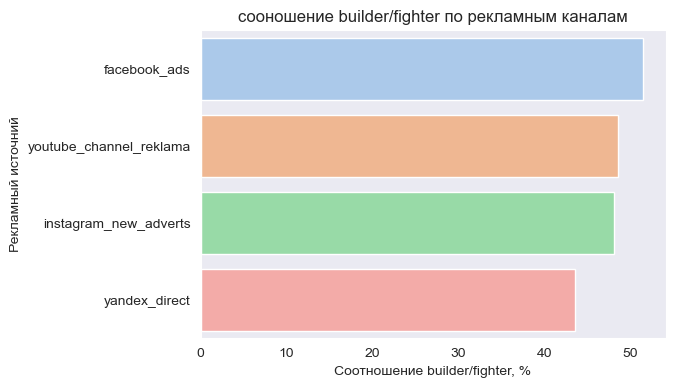

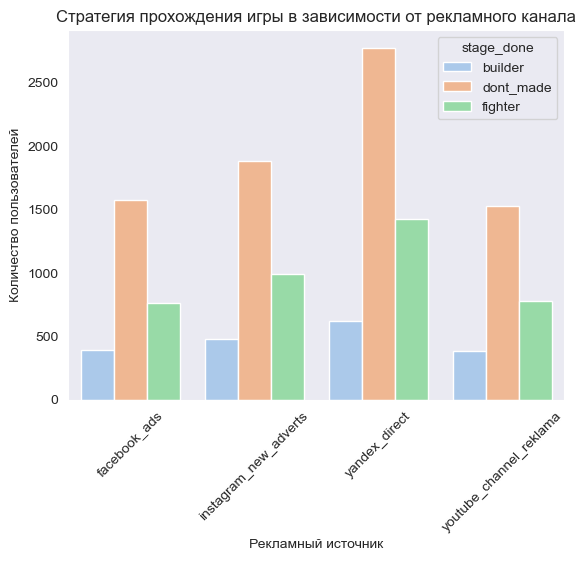

In [33]:
# таблица распределения пользователей, прошедших первый уровень, по рекламным каналам
fighterd_builders_by_source = users.query('stage_done != "dont_made"').pivot_table(
    index='source', values='user_id', columns='stage_done', aggfunc='count').reset_index()
fighterd_builders_by_source['ratio_%'] = (
    fighterd_builders_by_source['builder'] / fighterd_builders_by_source['fighter'] *100)
fighterd_builders_by_source = fighterd_builders_by_source.sort_values(by='ratio_%', ascending=False)
display(fighterd_builders_by_source)

# диаграмма сооношения builder/fighter по рекламным каналам
plt.figure(figsize=(6, 4))
plt.title('сооношение builder/fighter по рекламным каналам')
sns.barplot(x='ratio_%', y='source', data=fighterd_builders_by_source)
plt.ylabel('Рекламный источний')
plt.xlabel('Соотношение builder/fighter, %')
plt.show()

# Стратегия прохождения игры в зависимости от рекламного канала
temp = users.groupby(['source', 'stage_done']).agg({'user_id': 'count'}).reset_index()
sns.barplot(x='source', y='user_id', hue='stage_done', data=temp)
plt.title('Стратегия прохождения игры в зависимости от рекламного канала')
plt.xlabel('Рекламный источник')
plt.xticks(rotation=45)
plt.ylabel('Количество пользователей');

Отношение "строитель"/"боец" для рекламных каналов различно:
- `Яндекс` 43,6%
- `Инстаграм` 48,1%
- `Ютуб` 48,6%
- `Фэйсбук` 51,5%

Для оценки активности пользователей далее рассмотрим среднее количество событий, построенных зданий, времени игры по рекламным каналам.

<a id='part3_3'></a>
### Продолжительность пользования игрой в разрезе источников

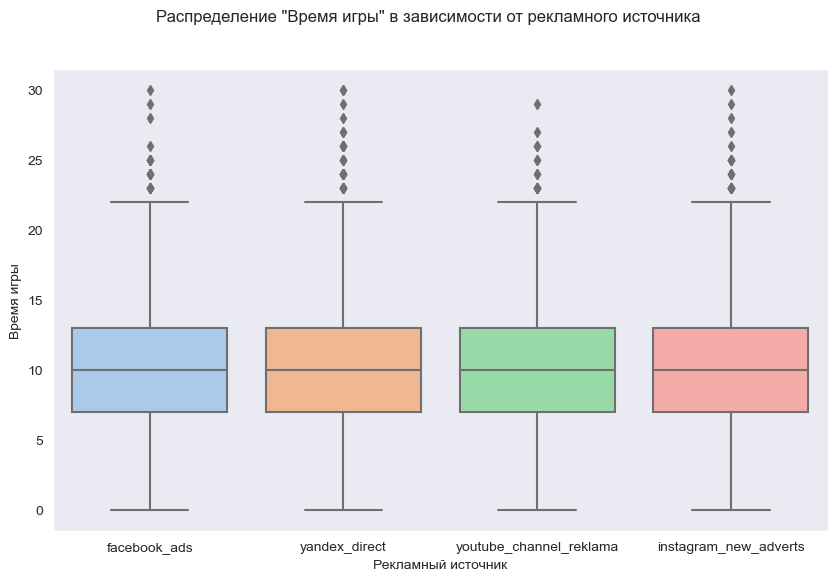


Среднее "Время игры" для рекламного источника facebook_ads: 10.22
Среднее "Время игры" для рекламного источника yandex_direct: 10.12
Среднее "Время игры" для рекламного источника youtube_channel_reklama: 10.08
Среднее "Время игры" для рекламного источника instagram_new_adverts: 10.29


In [34]:
# функция для автоматизации построения боксплот

def boxplot(dimension, sign):
    # Распределение времени использования игрой в зависимости от рекламного источинка
    plt.figure(figsize=(10, 6))
    plt.suptitle('Распределение "'+ sign +'" в зависимости от рекламного источника')
    sns.boxplot(y=users[dimension], x=users['source'])
    plt.xlabel('Рекламный источник')
    plt.ylabel(sign)
    plt.show();

    # среднее время использования игры
    print()
    for i in users['source'].unique():
        b = users.query('source == @i')[dimension].mean()
        print(f'Среднее "{sign}" для рекламного источника {i}: {b:.2f}')

    plt.show();

# Распределение времени использования игрой в зависимости от рекламного источинка
boxplot('duration', 'Время игры')

Среднне время игры не сильно различается по рекламным источникам:
- `instagram` 10.29 дней
- `facebook` 10.22 дней
- `yandex` 10.12 дней
- `youtube` 10.08 дней

<a id='part3_4'></a>
### Количество построенных зданий в зависимости от канала привлечения

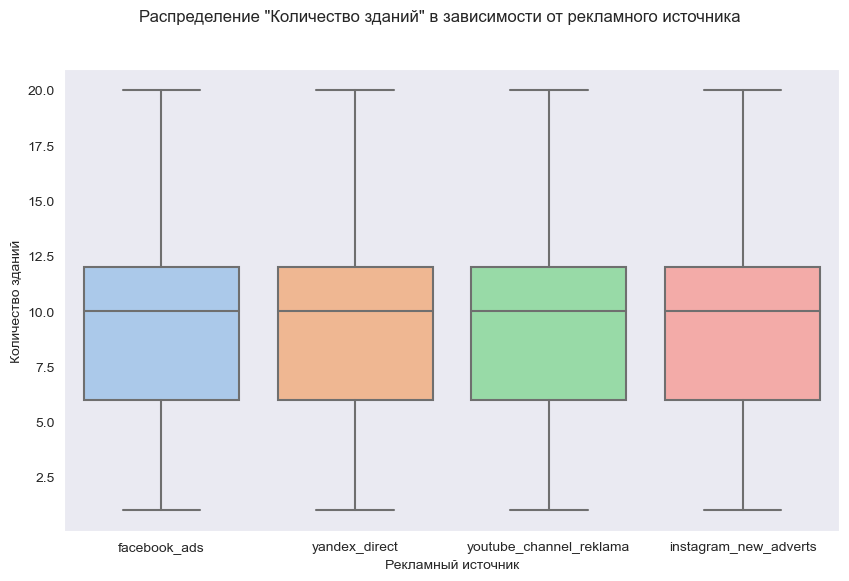


Среднее "Количество зданий" для рекламного источника facebook_ads: 9.59
Среднее "Количество зданий" для рекламного источника yandex_direct: 9.35
Среднее "Количество зданий" для рекламного источника youtube_channel_reklama: 9.30
Среднее "Количество зданий" для рекламного источника instagram_new_adverts: 9.51


In [35]:
boxplot('building_cnt', 'Количество зданий')


Среднне количество построенных зданий не сильно различается по рекламным источникам:
- `facebook` 9.59 дней
- `instagram` 9.51 дней
- `yandex` 9.35 дней
- `youtube` 9.30 дней

<a id='part3_5'></a>
### Количество совершенных событий в зависимости от источника

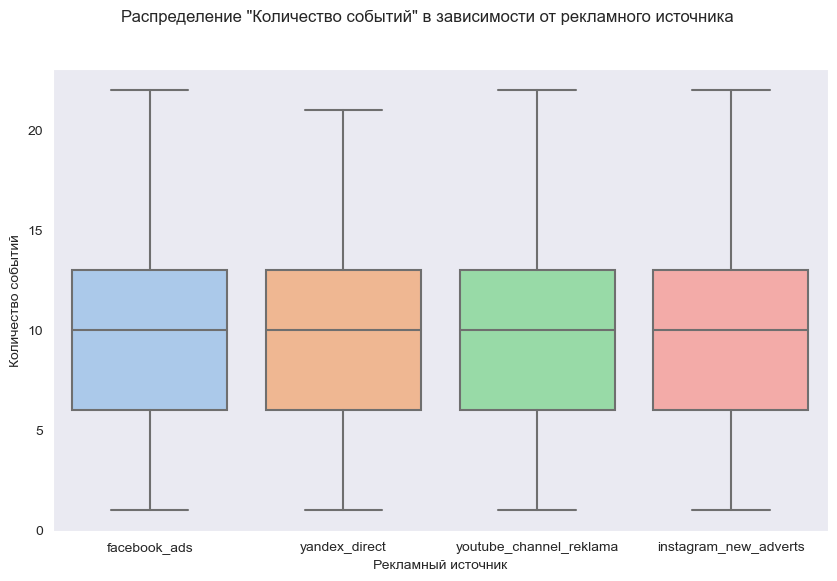


Среднее "Количество событий" для рекламного источника facebook_ads: 10.15
Среднее "Количество событий" для рекламного источника yandex_direct: 9.90
Среднее "Количество событий" для рекламного источника youtube_channel_reklama: 9.87
Среднее "Количество событий" для рекламного источника instagram_new_adverts: 10.09


In [36]:
boxplot('event_cnt', 'Количество событий')



Среднее количество совершенных событий слабо различается по рекламным источникам:
- `facebook` 10.15 дней
- `instagram` 10.09 дней
- `yandex` 9.9 дней
- `youtube` 9.87 дней

<a id='part3_6'></a>
### Выводы по влиянию источников привлечения на поведение пользователя в игре

Доля прошедших первый этап игры примерно одинакова по всем рекламным каналам и составляет 42-44 %. Не удалось выявить сильных различий в поведении пользователей в игре в зависимости от реламного канала.  Пользователи с каналов `facebook` и `instagram` проводят немного больше времени игре, строят больше зданий и совершают больше событий, чем пользователи с каналов `yandex` и `youtube`. Но различие не велико. 

Поскольку различия в поведении пользователей не значительны, можно рекомендовать рекламные каналы исходя из стоимости привлечения одного пользователя. 

**В порядке убывания приоритета**:
1. Ютуб
2. Яндекс
3. Инстаграм
4. Фэйсбук

<a id='part4'></a>
## Проверка статистических гипотез

<a id='part4_1'></a>
### Проверка гипотезы "время завершения уровня различается в зависимости способа прохождения"

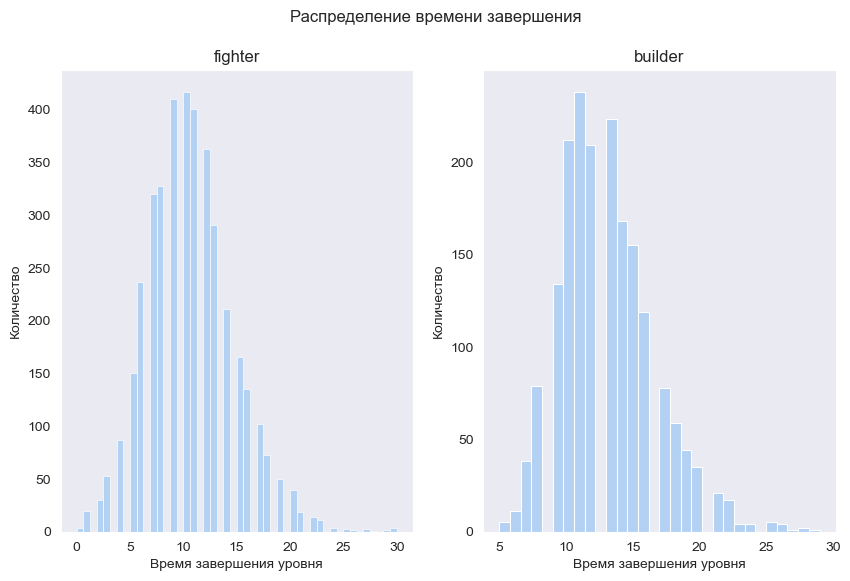

Дисперсия распределения времени прохождения "fighter": 16.86
Дисперсия распределения времени прохождения "builder": 12.44


In [37]:
# распределение времени завершения уровня для "бойцов"
fighter_duration = users.query('stage_done == "fighter"')['duration']

# распределение времени завершения уровня для "строителей"
builder_duration = users.query('stage_done == "builder"')['duration']

# Построение гистрограмм
plt.figure(figsize=(10, 6))
plt.suptitle('Распределение времени завершения')

plt.subplot(121)
plt.title('fighter')
sns.histplot(fighter_duration)
plt.xlabel('Время завершения уровня')
plt.ylabel('Количество')

plt.subplot(122)
plt.title('builder')
sns.histplot(builder_duration)
plt.xlabel('Время завершения уровня')
plt.ylabel('Количество')

plt.show();

# Расчет дисперсий
print(f'Дисперсия распределения времени прохождения "fighter": {fighter_duration.var(ddof=1):.2f}')
print(f'Дисперсия распределения времени прохождения "builder": {builder_duration.var(ddof=1):.2f}')

- Нулевая гипотеза (Н0): время прохождения уровня пользователей "бойцов" (выбравших стратению прохождения путем победы над противником" и "строителей" (победа через реализацию проекта" одинаково.
- Альтернативная гипотеза (Н1): время прохождения "строителей" выше,чем у "бойцов"

Проверяем с помощью критерия Стьюдента, учитывая разницу дисперсий в параметре `equal_var`

In [38]:
alpha = 0.05 # критерий статистической значимости

print(f'Медианное время прохождения уровня "бойцов": {(fighter_duration.median()):.2f}')
print(f'Медианное время прохождения уровня "строителей": {(builder_duration.median()):.2f}')
temp = st.ttest_ind(fighter_duration, builder_duration, equal_var=False).pvalue
print(f'Значение P-value:, {temp}')
if temp < alpha/2: # уровень критической значимости делим на 2 т.к. тест односторонний
    print('Отвергаем нулевую гипотезу, время прохождения уровня у "строителей" выше,чем у "бойцов"')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Медианное время прохождения уровня "бойцов": 10.00
Медианное время прохождения уровня "строителей": 13.00
Значение P-value:, 2.6237027268065695e-106
Отвергаем нулевую гипотезу, время прохождения уровня у "строителей" выше,чем у "бойцов"


По результатам ститистического теста Манна-Уитни отвергаем нулевую гипотезу. Между временем прохождения уровня "строителями" и "бойцами" есть статистическая разница. Время прохождения "строителей" выше, чем у "бойцов".

<a id='part4_2'></a>
### Провека гипотезы "время завершения уровня различается в зависимости от источника привлечения пользователя"

**План действий**: получим время завершения уровня для пользователей из каждого из четырех рекламных источников, проверим эти наборы данных на нормальность расрпределения. Если распределены нормально, будем проврять критерием Стьюдента, если не нормально, будем использовать критерий Манна-Уитни. Тесты будут односторонними, поэтому статистический критерий значимости поделим на 2. Испытаний будет (4-1)!, то есть шесть. Для уменьшения вероятности ложноположительного результата из-за множественных сравнений используем поправку Бонферрони, поделим статистический критерий значимости еще на шесть.

In [39]:
# проверка распределений на нормальность
sources_list = users['source'].unique()

# проверка 
for source in sources_list:
    print(f'\nРаспределение времени завершения уровня для канала {source}')
    temp = st.shapiro(users.query('source == @source')['duration']).pvalue
    print(f'Значение P-value:, {temp}')
    if temp < alpha:
        print('Отвергаем нулевую гипотезу, распределение не нормально')
    else:
        print('Принимаем нулевую гипотезу, распределение нормально')


Распределение времени завершения уровня для канала facebook_ads
Значение P-value:, 2.0643268656430312e-15
Отвергаем нулевую гипотезу, распределение не нормально

Распределение времени завершения уровня для канала yandex_direct
Значение P-value:, 3.369459034872062e-21
Отвергаем нулевую гипотезу, распределение не нормально

Распределение времени завершения уровня для канала youtube_channel_reklama
Значение P-value:, 3.3326897556744395e-13
Отвергаем нулевую гипотезу, распределение не нормально

Распределение времени завершения уровня для канала instagram_new_adverts
Значение P-value:, 6.435717290313261e-17
Отвергаем нулевую гипотезу, распределение не нормально


Распределения не нормальны, используем критерий Манна-Уитни.
- Нулевая гипотеза (Н0): время прохождения уровня для пользователей из разных рекламных каналов одинаково.
- Альтернативная гипотеза (Н1): время прохождения для пользователей из разных каналов различается (у одного из каналов больше, чем у другого)

In [40]:
# Распределение времени завершения уровня для yandex
yandex = users.query('source == "yandex_direct"')['duration']
yandex = yandex.rename('yandex_direct')

# Распределение времени завершения уровня для facebook
facebook = users.query('source == "facebook_ads"')['duration']
facebook = facebook.rename('facebook_ads')

# Распределение времени завершения уровня для youtube
youtube = users.query('source == "youtube_channel_reklama"')['duration']
youtube = youtube.rename('youtube_channel_reklama')

# Распределение времени завершения уровня для instagram
instagram = users.query('source == "instagram_new_adverts"')['duration']
instagram = instagram.rename('instagram_new_adverts')

# функция для проверки
def test_mw(n1, n2):
    print(f'\nСравниваем канал {n1.name} с каналом {n2.name}')
    print(f'Медианное время прохождения уровня {n1.name}: {n1.mean():.2f}')
    print(f'Медианное время прохождения уровня {n2.name}: {n2.mean():.2f}')
    temp = st.mannwhitneyu(n1, n2).pvalue
    print(f'Значение P-value:, {temp}')
    if temp < alpha/12: # уровень критической значимости делим на 12 т.к. тест односторонний (/2) и поправка Бонферрони (/6)
        if n1.median() > n2.median():
            print(f'Отвергаем нулевую гипотезу, время прохождения уровня у {n1.name} выше, чем у {n2.name}')
        else:
            print(f'Отвергаем нулевую гипотезу, время прохождения уровня у {n2.name} выше, чем у {n1.name}')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

In [41]:
test_mw(yandex, facebook) # яндекс против фэйсбук
test_mw(yandex, youtube) # яндекс против ютьюб
test_mw(yandex, instagram) # яндекс против инстаграмм
test_mw(facebook, youtube) # фэйсбук против ютьюб
test_mw(facebook, instagram) # фэйсбук против инстаграмм
test_mw(youtube, instagram) # ютьюб против инстаграмм


Сравниваем канал yandex_direct с каналом facebook_ads
Медианное время прохождения уровня yandex_direct: 10.12
Медианное время прохождения уровня facebook_ads: 10.22
Значение P-value:, 0.3288307383468515
Не получилось отвергнуть нулевую гипотезу

Сравниваем канал yandex_direct с каналом youtube_channel_reklama
Медианное время прохождения уровня yandex_direct: 10.12
Медианное время прохождения уровня youtube_channel_reklama: 10.08
Значение P-value:, 0.96210562788677
Не получилось отвергнуть нулевую гипотезу

Сравниваем канал yandex_direct с каналом instagram_new_adverts
Медианное время прохождения уровня yandex_direct: 10.12
Медианное время прохождения уровня instagram_new_adverts: 10.29
Значение P-value:, 0.07413610940016724
Не получилось отвергнуть нулевую гипотезу

Сравниваем канал facebook_ads с каналом youtube_channel_reklama
Медианное время прохождения уровня facebook_ads: 10.22
Медианное время прохождения уровня youtube_channel_reklama: 10.08
Значение P-value:, 0.3591497685498603

По результатам статистического теста Манна-Уитни не получилось опровергнуть нулевую гипотезу о том, что время прохождения уровня для пользователей из разных каналов одинаково.

<a id='part4_3'></a>
### Вывод по статистическому анализу

- Между временем прохождения уровня "строителями" и "бойцами" есть статистическая разница. Время прохождения "строителей" выше, чем у "бойцов".
- Статистических различий во времени прохождения уровня пользователями из разных источников не выявлено. Время их прохождения одинаково.

<a id='part_5'></a>
## Общий вывод

Были изучены данные по активности пользователей в игре "Космические братья" **с 04 мая 2020 по 05 июня 2020**. Эти клиенты были привлечены в результате рекламной кампании, проводвшейся с **04 по 10 мая 2020**. 
Все пользователи пришли в игру через рекламные каналы `Facebook`, `Instagram`, `YouTube`, `Yandex`.


Затраты на рекламу распределились примерно поровну между `Yandex`, `Instagram` и `Facebook` (**28-29%**),  **14 %** составляла доля `Youtube`. Самые высокие затраты на привлечение одного клиента через канал `Facebook` (**0,79**), самые низкие - `Youtube` (**0,40**). Через `Yandex` при примерно одинаковых общих затратах удалось привлечь большее количество клиентов по сравнению с `Facebook` и `Instagram`. За счет этого стоимость привлечения одного клиента составила **0,46**. Для `Instagram` стоимость привлечения одного клиента **0,65**.


В процессе рекламной кампании наблюдается значительное снижение числа привлекаемых клиентов и, соответственно, затрат на рекламу. Вероятно, это связано с динамикой расходования рекламного бюджета.
С 4 по 10 мая наблюдается рост числа событий, совершаемых пользователями в игре. Это связано с притоком новых игроков от рекламны. Далее спад т.к. новых игроков не приходило, а действующие пользователи постепенно проходили первый этап или бросали игру.


Среднее время использования игры составило **10 дней**, в среднем пользователи строили **9 зданий** и совершали **10 событий**. **Пользователи прошедшие 1 этап через завершение пректа в среднем строят больше зданий, совершают больше событий и больше времени проводят в игре, чем пользователи, которые прошли 1 этап путем победы над противником**. Меньше всего активны пользователи не завершившие 1 этап.


**43% пользователей прошли первый этап**. Среди завершивших первый этап большая часть (**примерно 2/3**) прошла его путем победы над первым противником. Меньшая часть игроков (**1/3**) добилась победы через завершение проекта.

Доля прошедших первый этап игры примерно одинакова по всем рекламным каналам и составляет 42-44 %. С канала `yandex_direct` приходит несколько меньше пользователей с профилем "строитель" по сравнению с другими каналами. Не удалось выявить сильных различий в поведении пользователей в игре в зависимости от реламного канала.  Пользователи с каналов `facebook` и `instagram` проводят немного больше времени игре, строят больше зданий и совершают больше событий, чем пользователи с каналов `yandex` и `youtube`. Но различие не велико. Через канал `yandex_direct` привелкается несколько меньшее количество игроков с профилем "стритель", по сравнению с каналами `facebook`, `youtube`, `instagram`. 

Статистическими методами показано, что:
- Между временем прохождения уровня "строителями" и "бойцами" есть статистическая разница. **Время прохождения "строителей" выше, чем у "бойцов"**.
- **Статистических различий во времени прохождения уровня пользователями из разных источников не выявлено**. Время их прохождения одинаково.

Можно разделить рекламные каналы на: 
- Привлекающие пользователей более высокого качества (более активные, больше доля "строителей"), но меньшее количество - это `facebook` и `instagram`, `youtube`
- привлекающий больше пользователей количественно, но менее качественных. Больше доля "бойцов", меньше проводят времени в игре, меньше строят зданий и совершают событий. Это `yandex`

Для текущей модели монетизации можно рекомендовать сделать приоритетным рекламным каналом `youtube` обеспечивающий пользователей высокого качества, но затраты на привлечение ниже, чем по каналам `facebook` и `instagram`. Если будет выбрана модель монетизации не связанная с показом рекламы в окне строительства, интересным каналом привлечения может стать также `yandex`, также с низкими затратами на привлечение клиентов.



